# Custom Data Set
Food101 starting with 3 classes.

It's import to start of with a small scale and scale up when necessary.

Speeds up experimentation time

In [1]:
# Get Data
import requests
import zipfile
from pathlib import Path

# Set up a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists ... skipping")
else:
    print(f"{image_path} directory does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, steak, and sushi data...")
    f.write(request.content)

# Unzip the file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, and sushi data...")
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exists ... skipping
Unzipping pizza, steak, and sushi data...


In [2]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contenst"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi


Random image path: data/pizza_steak_sushi/test/pizza/648055.jpg
Random image class: pizza
Random image height: 512
Random image width: 512


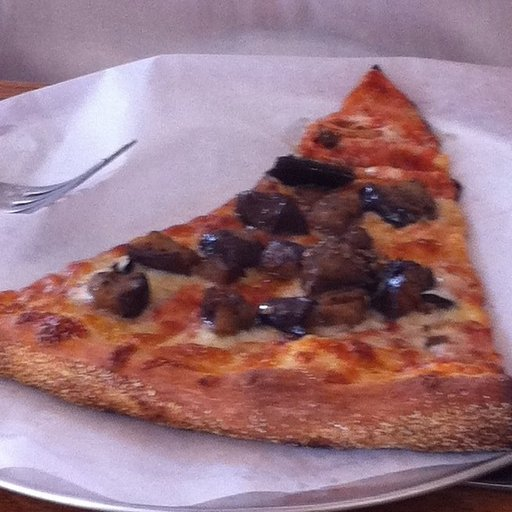

In [3]:
import random
from PIL import Image

#random.seed(2697)

# Set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"



# Display a random image
image_path_list = list(image_path.glob("*/*/*.jpg"))
rand_image_path = random.choice(image_path_list)

image_class = rand_image_path.parent.stem

img = Image.open(rand_image_path)
print(f"Random image path: {rand_image_path}")
print(f"Random image class: {image_class}")
print(f"Random image height: {img.height}")
print(f"Random image width: {img.width}")
img

## Transforming the data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors 
2. Turn it into a `torch.utils.data.Dataset` and then subsequently turn this into a `torch.utils.data.DataLoader`, we'll call these dataset and dataloader


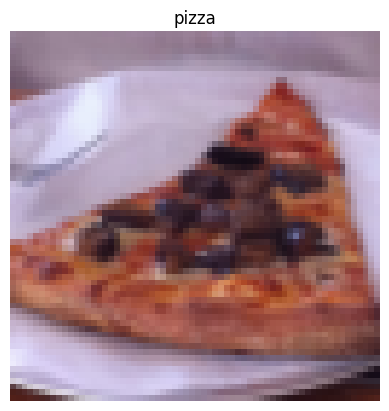

In [4]:
# Let's turn each image into tensors
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Create a transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()
])

tensor_img = data_transform(img)
tensor_img_permute = tensor_img.permute(1,2,0)
plt.title(image_class)
plt.axis(False)
plt.imshow(tensor_img_permute);


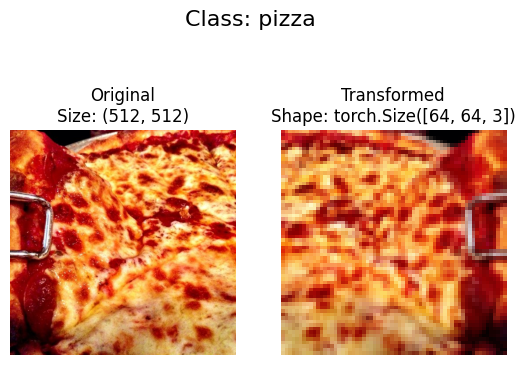

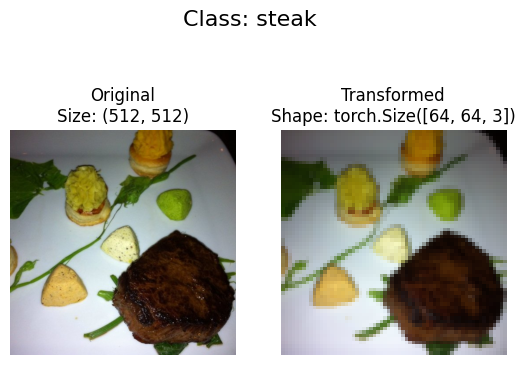

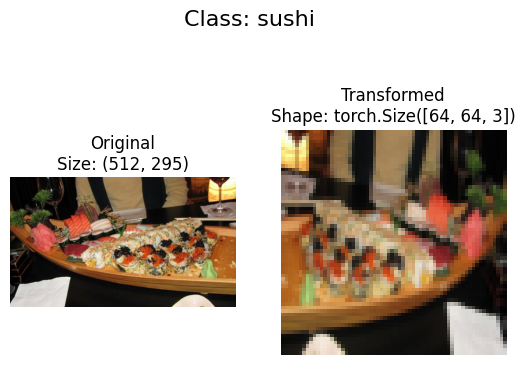

In [5]:
def plot_transformed_images(image_path: list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    rand_image_paths = random.sample(image_path, k=n)
    for image_path in rand_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed\nShape: {transformed_img.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16);
    
plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        seed=None);

## Loading data to a custom dataset - ImageFolder

We can load image classification data using `torchvision.datasets.ImageFolder`

In [6]:
# Use ImageFolder to create dataset

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

class_names = train_data.classes

In [7]:
img, label = train_data[0][0], train_data[0][1]
img, class_names[label]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [26]:
# Turn this into a DataLoader!
BS = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BS,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BS,
                              num_workers=os.cpu_count(),
                              shuffle=False)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [27]:
img, label = next(iter(train_dataloader))

print(f"Image Shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label Shape: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label Shape: torch.Size([1])
